<a href="https://www.kaggle.com/code/ramsesmdlc/titanic-linear-regression-model?scriptVersionId=120899631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [33]:
#Type of machine learning system to build:
    #1. Supervised Learning.
    #2. Batch Learning (also called "offline learning").
    #3. Model-based learning.

#Python Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # graphs

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# __1. Loading the Data__

Showing only the first ten rows of the Data (the first row is the head, and the following rows are data points).

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# __2. Exploring the Data__

# __2.1. Looking at the Data Structure__

## __2.1.1. Getting information/description of data__:
1. Number of rows and columns
2. Number and names of features' type (float64, int64, object)
3. Number of non-null values
4. Name of features

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Dictionary

1. survival - Survival (0 = No, 1 = Yes)
2. pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex - Sex 
4. Age - Age in years
5. sibsp - number of siblings / spouses aboard the Titanic.
        5.1. Sibling = brother, sister, stepbrother, stepsister.
        5.2. Spouse = husband, wife (mistresses and fiancés were ignored).
6. parch - number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        6.1. Parent = mother, father
        6.2. Child = daughter, son, stepdaughter, stepson
        6.3. Some children travelled only with a nanny, therefore parch=0 for them.
7. ticket - Ticket number
8. fare - Passenger fare
9. cabin - Cabin number
10. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## __2.1.2. Categories that exist in a feature__:

After checking the first rows of data, we know the following about the features "Sex" and "Embarked":
1. They are categorical attributes (object)
2. They have repetitive values
3. They have several categories

After checking the first rows of data, we know the following about the features "Pclass", "SibSp", and "Parch":
1. They are categorical attributes (int64)
2. They have repetitive values
3. They have several categories

In [4]:
#Categories in a feature.
training_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
#Categories in a featuree.
training_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
#Categories in a feature.
training_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
#Categories in a feature.
training_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
#Categories in a feature.
training_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## __2.1.3. Summary of numerical attributes__:

In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)

In [9]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## __2.1.4. Summary of numerical attributes (in a graph way)__:

Histograms are built for each numerical attribute (showing the number of instances on the vertical axis that a given value ranges in the horizontal axis).

The data have not been scaled or capped. 

> There are no preprocessed attributes.

Be careful of tail-heavy histograms, and how we can transform them into more bell-shaped distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

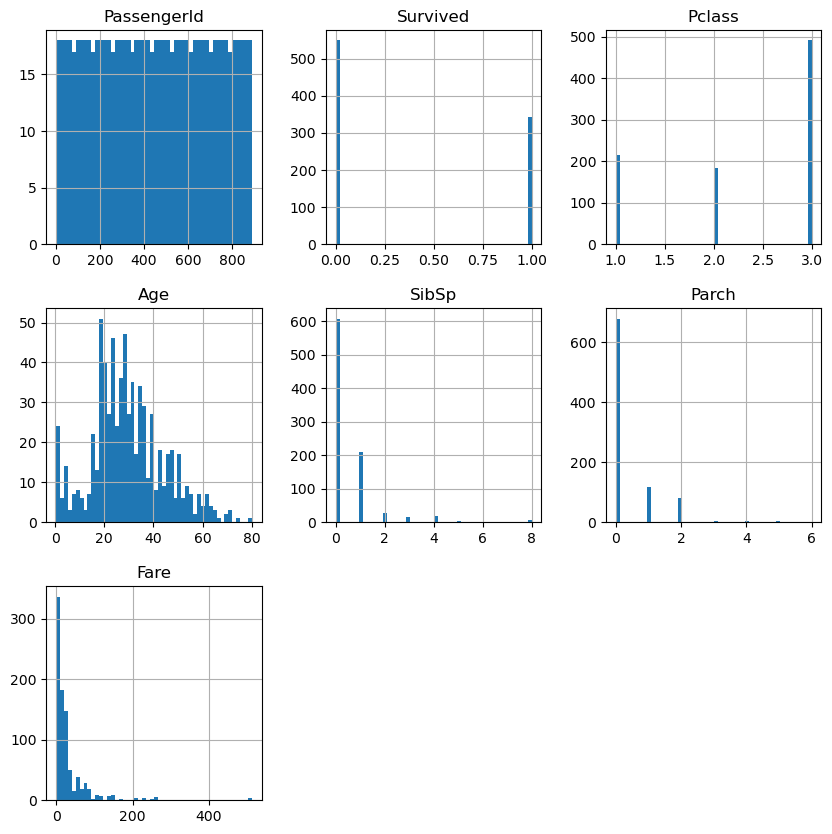

In [10]:
#The function "Figsize" is used for adjusting the size values of a graph (x,y).

#Dataframe.plot

training_data.hist(bins= 50, figsize = (10,10))
plt.show

# __3. Creating a Test Set__

Although this competition has a separate Test Set, I have decided to set aside from the "Training Set" another "Test Set". It is theoretically simple picking 20% of the dataset.

There are a couple of ways to create a Test Set. They are the followings:
1. Option 1: shuffling indices and then splitting data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> No established "random number generator seed" to generate the same shuffled indices for the Test Set could be a problem. With this function, the generation of different Test Sets every time we run is avoided.

> It could be problematic if the dataset is updated. Maintaining stable the "training and test data" after the dataset is updated is achievable if we establish identifiers for the data points that will be part of the training and test set. <-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 
        

2. Option 2: Using the Scikit Learn function to split data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> This function allows splitting the data into training data and a test set. In addition, it has the parameter to set the "random number generator seed" called "random_state"

3. Option 3: Using the "Scikit Learn" function to split the data in a stratified way. <-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 

> <span style="color:black">__Caution:__</span> This option (stratified sampling) is appropriate if the dataset is not large enough relative to the number of attributes; therefore, it is avoided the risk of sampling bias.

> The purpose of this is to split the entire dataset into homogeneous groups. Then from those groups, we sample the right amount of items that represent each of them fairly. Finally, those samples are going to be part of the Test Set (i.e., the Test Set is going to have representative data from each group of the entire dataset).

> Do not forget to deal with or preprocess NA values before applying this procedure.

### Developing Option 1 (shuffling indices and then splitting data randomly.)

In [11]:
#"random number generator seed"
np.random.seed(66)

#Function to split the dataset 
    #The role of indices in this function is relevant. 
    #np.random.permutation(x): Randomly permute a sequence, or return a permuted range. 
        #If x is a multi-dimensional array, it is only shuffled along its first index.
        #If x is an array, make a copy and shuffle the elements randomly.
    #iloc: integer-location based indexing for selection by position.
        #Indexing just the rows that belong to the "training set" and "test set"
    
def split_dataset(dataset, test_ratio):
    shuffled_indices_dataset = np.random.permutation(len(dataset))
    size_of_test_set = int(len(dataset)*test_ratio)
    indices_of_test_set = shuffled_indices_dataset[:size_of_test_set]
    indices_of_train_set = shuffled_indices_dataset[size_of_test_set:]
    return dataset.iloc[indices_of_train_set], dataset.iloc[indices_of_test_set]

In [12]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #The newly created and returned index will help build the training set and test set.
    
train_set2, test_set2 = split_dataset(training_data, 0.2)

#Printing the "len" of the new training set (version 2)
len(train_set2)

713

In [13]:
#Printing the "len" of the new test set (version 2)
len(test_set2)

178

In [14]:
#Printing a couple of rows of the new training set (version 2)
train_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [15]:
#Printing a couple of rows of the new test set (version 2)
test_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


### Developing Option 2 (Using the Scikit Learn function to split data randomly)

In [16]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #In this function, shuffle by default is True.
    #Save plenty of time!

train_set3, test_set3 = train_test_split(training_data, test_size = 0.2, random_state = 66)

#Printing the "len" of the new training set (version 3)
len(train_set3)

712

In [17]:
#Printing the "len" of the new test set (version 3)
len(test_set3)

179

In [18]:
#Printing a couple of rows of the new training set (version 3)
train_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [19]:
#Printing a couple of rows of the new test set (version 3)
test_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


# __4. Visualize the Data__

This process is heleful to gain insights about the training data.
> Large training datasets can be sampled for the visualization stage, meanwhile small training datasets can be entirely explored.

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

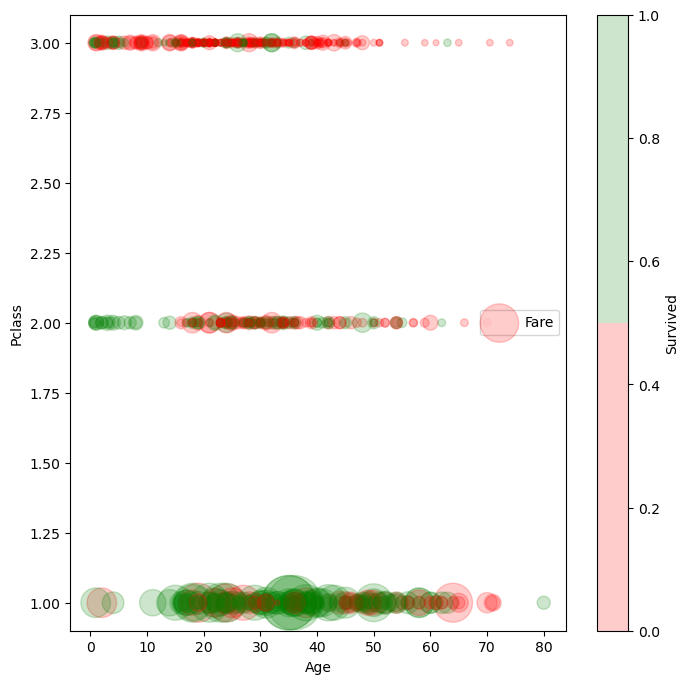

In [57]:
#In this scenario, it is used the original "training set" given by this Kaggle problem

#Dataframe.plot
    #cmap:The Colormap
    #Label position
    #...
    
cmap = (mpl.colors.ListedColormap(['red', 'green']))

training_data.plot(kind= "scatter", x="Age", y="Pclass", s=3*training_data["Fare"], figsize = (8,8), c="Survived", cmap = cmap, label = "Fare", colorbar=True ,alpha= 0.2)

<span style="color:red">__IMPORTANT: THIS IS AN UNFINISHED NOTEBOOK__"</span>

I am still working on the following items:
1. ...
2. Correlations
3. Attribute combinations
4. Data cleaning
5. Text and categorical attributes
6. Feature scaling
7. Transformation pipelines
8. Training and evaluating the training set (Cross Validation)
9. Tuning the model
10. Evaluate the Test Set